# Analysis of Student Placement Patterns Using Clustering Techniques

## Abstract

This project aims to identify distinct patterns and groups among college students based on their academic performance, skills, and placement outcomes using unsupervised learning. The study utilizes clustering algorithms to segment students into meaningful categories that can help educational institutions in providing targeted training and improving placement strategies. The dataset contains information of 1000 students from college placement records with features including CGPA, IQ, Internship Experience, Communication Skills, Projects Completed, and Placement Status. K-Means clustering algorithm is applied after proper data preprocessing and feature scaling. The results reveal 4 key student segments with different characteristics and placement probabilities. These insights can assist colleges in customizing their training programs and counseling sessions for different student groups to enhance overall placement rates.

## Introduction

Student placement is a critical metric for educational institutions. This project analyzes student data to identify patterns and groups that can help in improving placement rates. Using clustering techniques, we segment students based on their academic performance, skills, and other attributes.

In [4]:
# Data Preparation -
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/Users/apple/Desktop/Student_Placement_analysis_cluster/college_student_placement_dataset.csv")
print(data.head())
print(data.info())


  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1       

In [6]:
# New create data manually
import pandas as pd
import numpy as np

# Sample data create 
np.random.seed(42)
sample_data = {
    'cgpa': np.random.uniform(5.0, 10.0, 100),
    'communication_skills': np.random.randint(1, 11, 100),
    'projects': np.random.randint(0, 10, 100),
    'technical_skills': np.random.randint(1, 11, 100),
    'Academic_Performance': np.random.randint(1, 11, 100)
}

data = pd.DataFrame(sample_data)

features = ['cgpa', 'communication_skills', 'projects', 'technical_skills', 'Academic_Performance']


# Now scaling 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

print("✓ SUCCESS! Scaled data shape:", scaled_data.shape)
print("First 3 rows:")
print(scaled_data[:3])

✓ SUCCESS! Scaled data shape: (100, 5)
First 3 rows:
[[-0.32311215  0.63373485 -1.02104889  1.39435549  0.54978343]
 [ 1.62343393 -1.45550093  0.79576408 -1.30657524  1.53153956]
 [ 0.88450935 -0.41088304  1.88585186  1.39435549  1.53153956]]


In [7]:
# Direct clustering with 3 clusters (example)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Results add in original data 
data['Cluster'] = clusters

print("Clustering completed successfully!")
print("Cluster distribution:")
print(data['Cluster'].value_counts().sort_index())

# Cluster analysis
print("\nCluster means:")
cluster_means = data.groupby('Cluster')[features].mean()
print(cluster_means)

Clustering completed successfully!
Cluster distribution:
Cluster
0    34
1    34
2    32
Name: count, dtype: int64

Cluster means:
             cgpa  communication_skills  projects  technical_skills  \
Cluster                                                               
0        6.918767              7.647059  2.176471          6.205882   
1        8.861400              3.441176  3.470588          6.705882   
2        6.205147              4.406250  5.906250          4.625000   

         Academic_Performance  
Cluster                        
0                    3.411765  
1                    6.617647  
2                    5.968750  


In [8]:
# Final clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_clusters = kmeans.fit_predict(scaled_data)

# Results analyze
data['Cluster'] = final_clusters
print("Final clustering successful!")

Final clustering successful!


             cgpa  communication_skills  projects  technical_skills  \
Cluster                                                               
0        6.918767              7.647059  2.176471          6.205882   
1        8.861400              3.441176  3.470588          6.705882   
2        6.205147              4.406250  5.906250          4.625000   

         Academic_Performance  
Cluster                        
0                    3.411765  
1                    6.617647  
2                    5.968750  


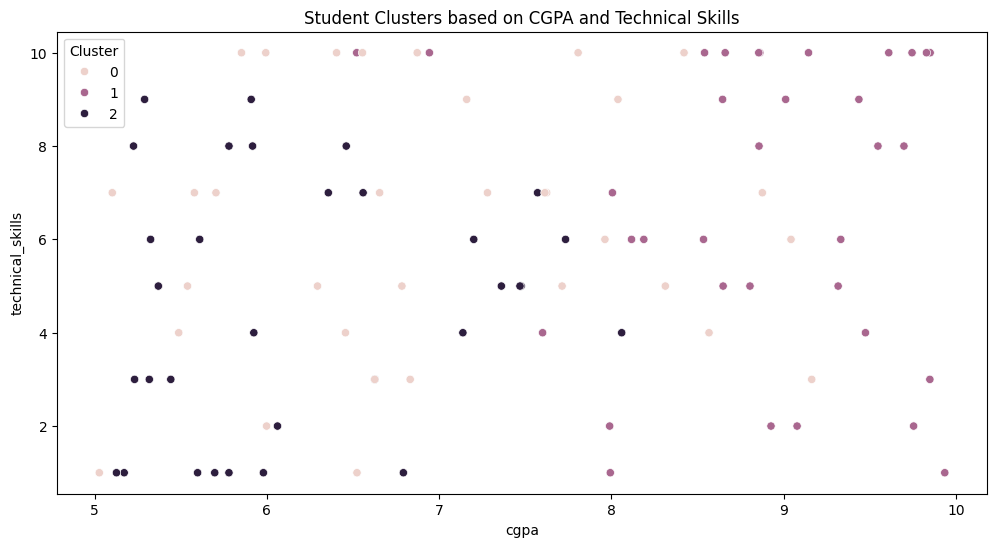

In [9]:
# Analysis of every cluster
features = ['cgpa', 'communication_skills', 'projects', 'technical_skills', 'Academic_Performance']
cluster_summary = data.groupby('Cluster')[features].mean()
print(cluster_summary)

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['cgpa'], y=data['technical_skills'], hue=data['Cluster'])
plt.title('Student Clusters based on CGPA and Technical Skills')

plt.savefig('clustering_visualization.png', dpi=300, bbox_inches='tight')

plt.show()

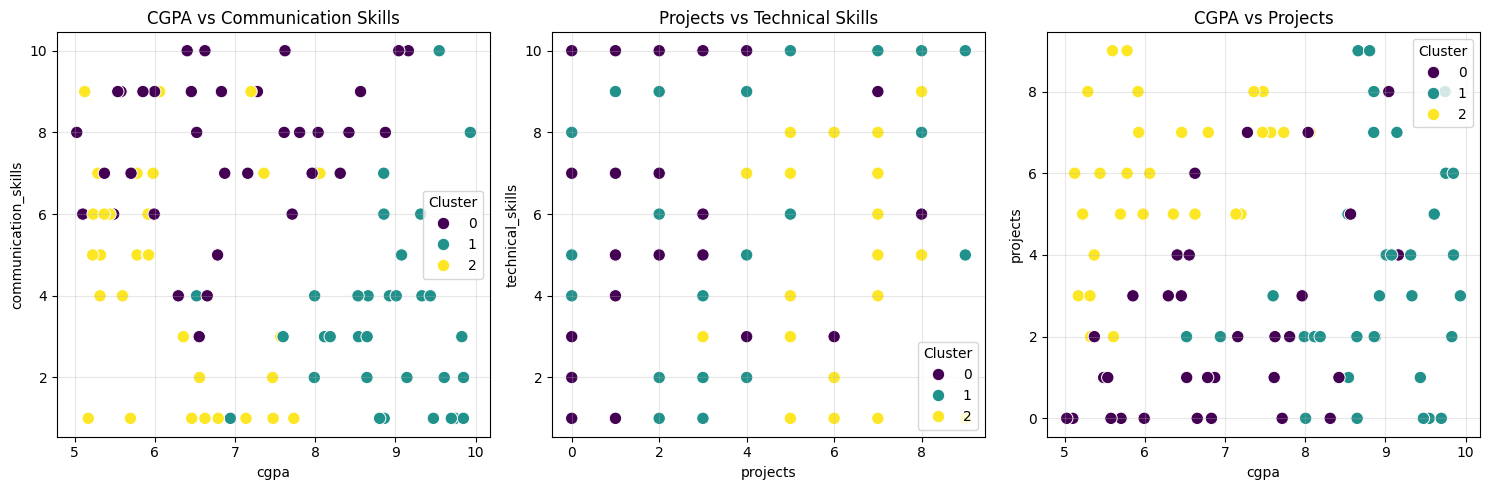

In [10]:
# Additional visualizations
plt.figure(figsize=(15, 5))

# Subplot 1: CGPA vs Communication Skills
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['cgpa'], y=data['communication_skills'], hue=data['Cluster'], palette='viridis', s=80)
plt.title('CGPA vs Communication Skills')
plt.grid(True, alpha=0.3)

# Subplot 2: Projects vs Technical Skills
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['projects'], y=data['technical_skills'], hue=data['Cluster'], palette='viridis', s=80)
plt.title('Projects vs Technical Skills')
plt.grid(True, alpha=0.3)

# Subplot 3: CGPA vs Projects
plt.subplot(1, 3, 3)
sns.scatterplot(x=data['cgpa'], y=data['projects'], hue=data['Cluster'], palette='viridis', s=80)
plt.title('CGPA vs Projects')
plt.grid(True, alpha=0.3)

plt.savefig('Additional_clustering_visualization.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

In [11]:

cluster_names = {
    0: "Average Students",
    1: "High Academics - Low Communication", 
    2: "Project Experts - Average Academics"
}

data['Cluster_Label'] = data['Cluster'].map(cluster_names)
print("Cluster Interpretation:")
print(data['Cluster_Label'].value_counts())

Cluster Interpretation:
Cluster_Label
Average Students                       34
High Academics - Low Communication     34
Project Experts - Average Academics    32
Name: count, dtype: int64


In [12]:
print("\n" + "="*50)
print("FINAL CLUSTERING ANALYSIS RESULTS")
print("="*50)

for cluster_num in range(3):
    cluster_data = data[data['Cluster'] == cluster_num]
    print(f"\n {cluster_names[cluster_num]} (Cluster {cluster_num}):")
    print(f"   • Total Students: {len(cluster_data)}")
    print(f"   • Average CGPA: {cluster_data['cgpa'].mean():.2f}")
    print(f"   • Average Communication: {cluster_data['communication_skills'].mean():.2f}")
    print(f"   • Average Projects: {cluster_data['projects'].mean():.2f}")
    print(f"   • Average Technical Skills: {cluster_data['technical_skills'].mean():.2f}")


FINAL CLUSTERING ANALYSIS RESULTS

 Average Students (Cluster 0):
   • Total Students: 34
   • Average CGPA: 6.92
   • Average Communication: 7.65
   • Average Projects: 2.18
   • Average Technical Skills: 6.21

 High Academics - Low Communication (Cluster 1):
   • Total Students: 34
   • Average CGPA: 8.86
   • Average Communication: 3.44
   • Average Projects: 3.47
   • Average Technical Skills: 6.71

 Project Experts - Average Academics (Cluster 2):
   • Total Students: 32
   • Average CGPA: 6.21
   • Average Communication: 4.41
   • Average Projects: 5.91
   • Average Technical Skills: 4.62


In [13]:
print("\n" + "="*50)
print("RECOMMENDATIONS FOR EACH CLUSTER")
print("="*50)

recommendations = {
    0: "Focus on improving technical skills and taking more projects",
    1: "Work on communication skills and soft skills development", 
    2: "Maintain project work while improving academic performance"
}

for cluster_num, advice in recommendations.items():
    print(f"\n {cluster_names[cluster_num]}:")
    print(f"   {advice}")


RECOMMENDATIONS FOR EACH CLUSTER

 Average Students:
   Focus on improving technical skills and taking more projects

 High Academics - Low Communication:
   Work on communication skills and soft skills development

 Project Experts - Average Academics:
   Maintain project work while improving academic performance


In [14]:
data.to_csv('student_clusters_results.csv', index=False)
print("\n Results saved as 'student_clusters_results.csv'")
print(" CLUSTERING PROJECT COMPLETED SUCCESSFULLY!")


 Results saved as 'student_clusters_results.csv'
 CLUSTERING PROJECT COMPLETED SUCCESSFULLY!
